## Under Sampling with EditedNearestNeighbours Method

# Edited Nearest Neighbours

The algorithms works as follows:

1) Train a KNN algorithm on the data (user defines number of neighbours, typically 3)

2) Find the 3 nearest neighbour to each observation (or the number defined by the user in Step 1)

3) Find the label of each of the neighbours (we know it, is the target in the dataset)

**Two undersampling strategies:**

4) **mode**: if **the majority of the neighbours** show the same label as the observation, then we keep the observation

5) **all**: if **all the neighbours** show the same label as the observation, then we keep the observation

6) Alternatively, we remove the observation of the dataset - **undersample**

7) The undersampled dataset, is the one left after removing observations


===

The algorithm removes observations which class are different from that of their neighbours. These are generally the observations difficult to classify and / or that introduce noise.

**In practice, samples of the majority class that are too similar to an observation of the minority class will be removed.**

So this is, in essence, the opposite of Condensed NN.

In [43]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for metrics
from sklearn.metrics import roc_auc_score

# from imblearn
from imblearn.under_sampling import EditedNearestNeighbours

## create simulated data

In [50]:
def create_data(sep):
    
    X,y = make_classification(n_samples=1000,
                              n_features=2,
                              n_redundant=0,
                              n_clusters_per_class=1,
                              weights=[0.99],
                              class_sep=sep,
                              random_state=1)
    
    X = pd.DataFrame(X, columns=['varA','varB'])
    y = pd.Series(y)
    
    return X,y

## resample using OneSidedSelection method

In [51]:
# lets generate data when sep = 2
X,y = create_data(sep=2)

In [52]:
X.shape, y.shape

((1000, 2), (1000,))

In [53]:
y.value_counts()

0    983
1     17
dtype: int64

In [54]:
enn = EditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

X_res, y_res = enn.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(978, 2) (978,)
Value Counts: 
0    961
1     17
dtype: int64


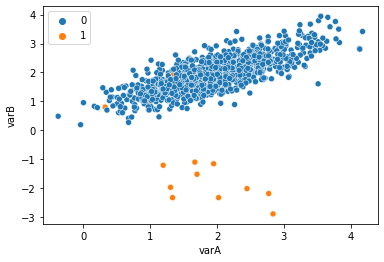

In [55]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

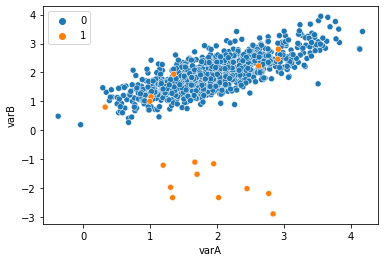

In [56]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

We dont see much reduction in the number of majority class observations as the classes are already separated well. Lets try checking with a very less separated classes data.

## Lets check for a partially separated class

In [57]:
X,y = create_data(sep=0)

In [58]:
enn = EditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

X_res, y_res = enn.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(960, 2) (960,)
Value Counts: 
0    943
1     17
dtype: int64


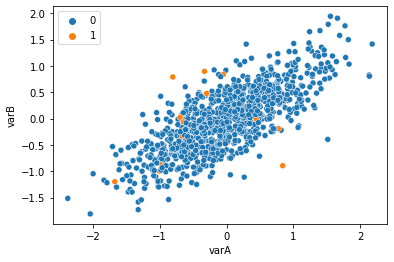

In [59]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

# we can very less separation and much overlapped since we provide a lower seperation value 

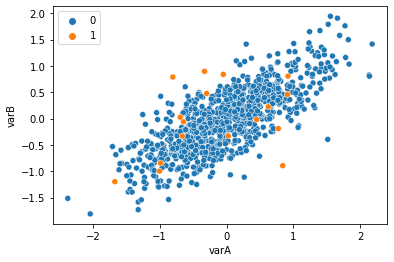

In [60]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

- Here also, we can see we do not see much difference in the reduction of the observations.
- Since the original and under sampled data are almost the same, the model performances will be pretty similar. 

## Different KNN values
### with mode = 'all'

In [65]:
def create_resampled_data(knn,X,y):
    enn = EditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=knn,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

    X_res, y_res = enn.fit_resample(X,y)
    print('Resample Data Shapes for knn = {}'.format(knn))
    print(X_res.shape, y_res.shape)
    print('Value Counts: ')
    print(y_res.value_counts())

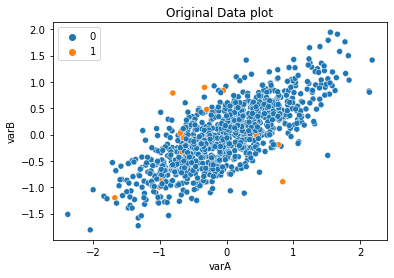

Resample Data Shapes for knn = 1
(979, 2) (979,)
Value Counts: 
0    962
1     17
dtype: int64


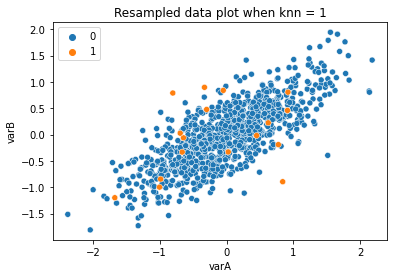

Resample Data Shapes for knn = 2
(969, 2) (969,)
Value Counts: 
0    952
1     17
dtype: int64


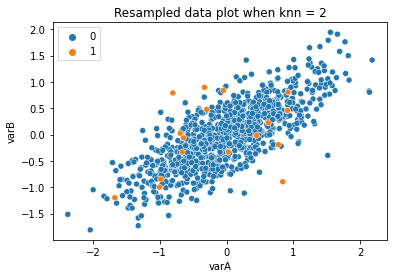

Resample Data Shapes for knn = 3
(960, 2) (960,)
Value Counts: 
0    943
1     17
dtype: int64


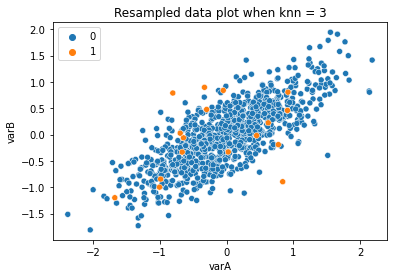

Resample Data Shapes for knn = 4
(946, 2) (946,)
Value Counts: 
0    929
1     17
dtype: int64


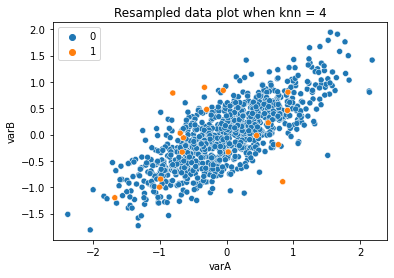

In [66]:
# when sep = 0
X, y = create_data(sep=0)

# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.title('Original Data plot')
plt.show()

for i in range(1,5):
    create_resampled_data(i,X,y)    
    # resampled data plot
    sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
    plt.title('Resampled data plot when knn = {}'.format(i))
    plt.show()
    

- We can see the reduction of observations count in the under sampled data is more with higher knn values

### with mode = 'mode'
- When most of the neighbours agree or matched with the observation in check

In [67]:
enn = EditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='mode',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

X_res, y_res = enn.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(997, 2) (997,)
Value Counts: 
0    980
1     17
dtype: int64


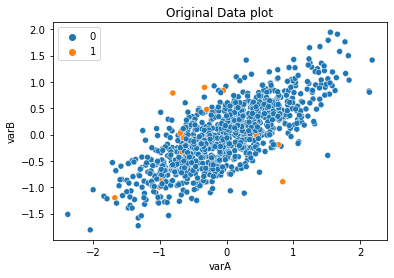

Resample Data Shapes for knn = 1
(979, 2) (979,)
Value Counts: 
0    962
1     17
dtype: int64


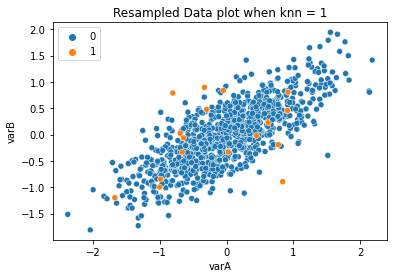

Resample Data Shapes for knn = 2
(969, 2) (969,)
Value Counts: 
0    952
1     17
dtype: int64


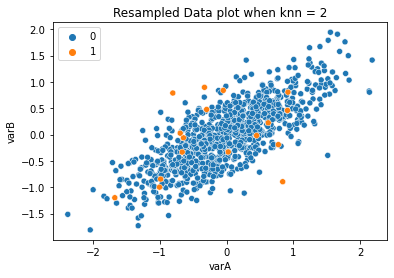

Resample Data Shapes for knn = 3
(960, 2) (960,)
Value Counts: 
0    943
1     17
dtype: int64


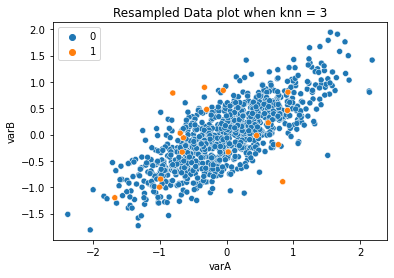

Resample Data Shapes for knn = 4
(946, 2) (946,)
Value Counts: 
0    929
1     17
dtype: int64


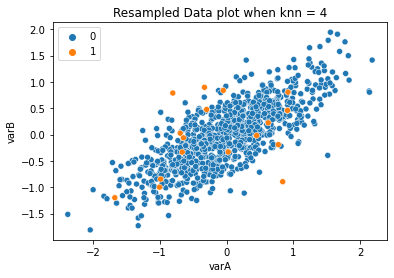

In [68]:
# when sep = 0
X, y = create_data(sep=0)

# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.title('Original Data plot')
plt.show()

for i in range(1,5):
    create_resampled_data(i,X,y)    
    # resampled data plot
    sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
    plt.title('Resampled Data plot when knn = {}'.format(i))
    plt.show()
    

- dont see much difference.

## Working on a real data

In [70]:
# sampling to only 10000 observations to speed up the computation
df = pd.read_csv('kdd2004.csv').sample(10000)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
136033,49.67,37.04,1.44,33.0,-44.5,1214.3,-0.27,1.62,24.5,-90.5,...,454.9,1.66,-2.79,6.0,-29.0,253.2,1.61,0.60,0.50,-1
1590,88.00,27.96,0.43,36.0,-47.0,483.6,0.47,-0.67,-5.0,-67.0,...,172.3,0.60,1.74,-4.0,-50.0,224.7,-0.24,0.09,0.24,-1
43764,60.95,21.33,-0.11,-57.5,-1.0,878.1,-0.21,-0.97,-34.0,-43.5,...,1204.0,-1.62,1.19,-5.0,-40.0,84.4,1.76,0.48,0.58,-1
132102,68.35,23.15,1.63,30.5,18.0,2149.6,-0.55,0.50,16.0,-64.0,...,2424.4,0.49,0.46,-2.0,-36.0,479.1,-0.30,0.15,0.08,-1
29699,26.55,32.43,-0.44,-45.0,21.0,601.6,0.54,0.06,-25.0,-54.0,...,1139.0,-1.05,2.03,-1.0,-13.0,-6.9,1.60,0.31,0.32,-1


In [71]:
df.shape

(10000, 75)

In [72]:
# check the target values ratios
df['target'].value_counts()

-1    9920
 1      80
Name: target, dtype: int64

In [73]:
df['target'].value_counts()/len(df)

-1    0.992
 1    0.008
Name: target, dtype: float64

## split the data

In [74]:
X_train, X_test, y_train,y_test = train_test_split(df.drop('target', axis = 1),
                                                  df['target'],
                                                  test_size=0.3,
                                                  random_state=0)
X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [75]:
# now lets prepare our under resampled data sets
enn = EditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2)

X_enn, y_enn = enn.fit_resample(X_train, y_train)
X_enn.shape, y_enn.shape

((6940, 74), (6940,))

In [76]:
# target value ratio
y_enn.value_counts()

-1    6881
 1      59
Name: target, dtype: int64

## plot and compare

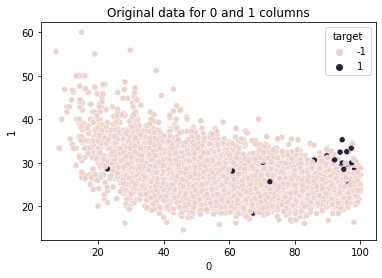

In [77]:
# original dataset

sns.scatterplot(data= X_train, x='0', y = '1', hue=y_train)
plt.title('Original data for 0 and 1 columns')
plt.show()

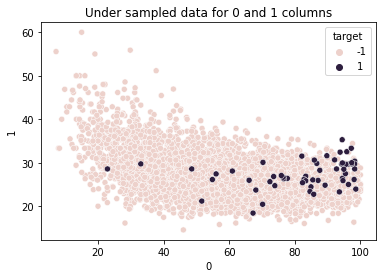

In [78]:
# onesided under sampled dataset

sns.scatterplot(data= X_enn, x='0', y = '1', hue=y_enn)
plt.title('Under sampled data for 0 and 1 columns')
plt.show()

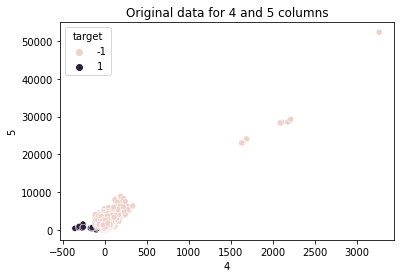

In [79]:
# original dataset

sns.scatterplot(data= X_train, x='4', y = '5', hue=y_train)
plt.title('Original data for 4 and 5 columns')
plt.show()

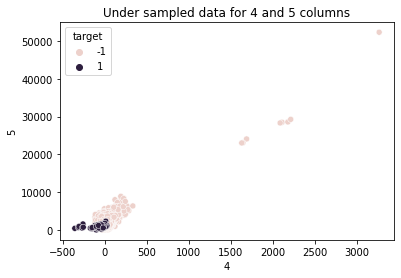

In [80]:
# condensed under sampled dataset

sns.scatterplot(data= X_enn, x='4', y = '5', hue=y_enn)
plt.title('Under sampled data for 4 and 5 columns')
plt.show()

## Model performance on original and condensed resample data

In [81]:
def create_randomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200,
                                n_jobs=2,
                                random_state=39,
                                max_depth=4)
    
    rf.fit(X_train, y_train)
    probs_train = rf.predict_proba(X_train)
    probs_test = rf.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [82]:
# for Original DataSet
create_randomForest(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9933922479787263
roc auc score for test data: 0.9713550408414456


In [83]:
# for condensed dataset
create_randomForest(X_enn, X_test, y_enn, y_test)

roc auc score for train data: 0.9937238133006879
roc auc score for test data: 0.9750635400182228


## On SVM classifier

In [84]:
def create_svc(X_train, X_test, y_train, y_test):
    
    svc = SVC(max_iter=1000, random_state=0, probability=True)
    
    svc.fit(X_train, y_train)
    probs_train = svc.predict_proba(X_train)
    probs_test = svc.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [85]:
# for original data
create_svc(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9194469609468668
roc auc score for test data: 0.9339823206892692


In [86]:
# for condensed dataset
create_svc(X_enn, X_test, y_enn, y_test)

roc auc score for train data: 0.922259525739016
roc auc score for test data: 0.9354849022522739


## Logistic Regression

In [87]:
def create_log(X_train, X_test, y_train, y_test):
    
    log = LogisticRegressionCV(max_iter=10000, random_state=0, solver='saga', n_jobs=2)
    
    log.fit(X_train, y_train)
    probs_train = log.predict_proba(X_train)
    probs_test = log.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [88]:
# for original data
create_log(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9007225549974482
roc auc score for test data: 0.9419268210808996


In [89]:
# for condensed dataset
create_log(X_enn, X_test, y_enn, y_test)

roc auc score for train data: 0.9028127070612028
roc auc score for test data: 0.9415112134145367


- Overall model performance on the resampled data seems to be better than on the original data
- Random Forest performs better than the rest of the models
- We can check with the 'mode' selection mode

In [92]:
# create a function to create condensed under sampled data and check the metrics

def create_undersampled_data(X_train, X_test,y_train,y_test):
    enn = EditedNearestNeighbours(sampling_strategy='auto', # removes from the majority class
                                  n_neighbors=3,            # setting the nearest neighbours count
                                  kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                                  n_jobs=2)

    X_res, y_res = enn.fit_resample(X_train,y_train)
    # for original data
    print("*******************")
    print('Metrics for Original Data: ')
    create_randomForest(X_train, X_test, y_train, y_test)
    # for condensed data
    print('Metrics for resampled Data: ')
    create_randomForest(X_res, X_test, y_res, y_test)

In [93]:
# trying for knn = 1,2 and 3
create_undersampled_data(X_train, X_test,y_train,y_test)

*******************
Metrics for Original Data: 
roc auc score for train data: 0.9933922479787263
roc auc score for test data: 0.9713550408414456
Metrics for resampled Data: 
roc auc score for train data: 0.9937238133006879
roc auc score for test data: 0.9750635400182228


- The model seems to perform almost the same for both the mode in our resampled data set.